1. Create a `Dockerfile` using the jupyter lab text editor

```Bash
docker run -it --rm -w ${PWD} -v ${PWD}:${PWD} -p 8888:8888 jupyter/r-notebook jupyter lab
```

2. With the first line in your `Dockerfile` inherit from the [r-notebook](https://hub.docker.com/r/jupyter/r-notebook) Docker image provided by the Jupyter team.
  - E.g. `FROM jupyter/r-notebook`

3. In the second line of your `Dockerfile` use `conda` and a `RUN` directive to install the latest versino of `tidyr`.
  - E.g. `RUN conda isntall -c conda-forge r-tidyr==1.0.0`

4. Close your Jupyter session.

5. Build an image using the `Dockerfile` you just created.

```Bash
docker build -t <some image name> .
```

6. Run your image.

```Bash
docker run -w ${PWD} -v ${PWD}:${PWD} -p 8888:8888 <image name>
```

(or if you prefer jupyter lab)

```Bash
docker run -w ${PWD} -v ${PWD}:${PWD} -p 8888:8888 <image name> jupyter lab
```

7. Read this `CSV` into a `tibble` in an R notebook:

https://github.com/fivethirtyeight/data/blob/master/unisex-names/unisex_names_table.csv

In [1]:

library('tidyverse')
library('ggrepel')
library('patchwork')

unisexnamesdf <- read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/unisex-names/unisex_names_table.csv") 


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1          v purrr   0.2.5     
v tibble  2.1.3          v dplyr   0.8.3     
v tidyr   1.0.0.9000     v stringr 1.4.0     
v readr   1.3.1          v forcats 0.3.0     
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'tibble' was built under R version 3.5.3"Warning message:
"package 'readr' was built under R version 3.5.3"Warning message:
"package 'dplyr' was built under R version 3.5.3"Warning message:
"package 'stringr' was built under R version 3.5.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'ggrepel' was built under R version 3.5.3"Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_double(),
  name = col_character(),
  total = col_double(),
  ma

8. Pivot the data so `male_share` and `female_share` are in the same column.

In [ ]:
unisexnamesdfp = unisexnamesdf %>% 
  pivot_longer(-c(name, total, X1, gap ), names_to="sex", values_to="share")

In [4]:
head(unisexnamesdfp)

X1,name,total,gap,sex,share
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,Casey,176544.3,0.16857313,male_share,0.5842866
1,Casey,176544.3,0.16857313,female_share,0.4157134
2,Riley,154860.7,0.01527814,male_share,0.5076391
2,Riley,154860.7,0.01527814,female_share,0.4923609
3,Jessie,136381.8,0.04433146,male_share,0.4778343
3,Jessie,136381.8,0.04433146,female_share,0.5221657


9. Turn the `name` column into a factor where the levels are sorted by the `total` column.

In [10]:
#  why do we need to do this?  why do we want to make a total column with text/character representation?
# why do we need a factor here?
unisexnamesdfp = mutate(unisexnamesdfp, totalchar = factor(total))

unisexnamesdfp = arrange(unisexnamesdfp, totalchar)

head(unisexnamesdfp)

X1,name,total,gap,sex,share,totalchar
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<fct>
919,Aeon,100.2110,0.07033087,male_share,0.4648346,100.21104
919,Aeon,100.2110,0.07033087,female_share,0.5351654,100.21104
918,Yacine,100.2304,0.08919789,male_share,0.5445989,100.2304
918,Yacine,100.2304,0.08919789,female_share,0.4554011,100.2304
917,Gwin,101.2434,0.12427315,male_share,0.5621366,101.243364
917,Gwin,101.2434,0.12427315,female_share,0.4378634,101.243364


In [11]:
# Now, we are rearranging by total (the numeric column)
# to undo the ordering by total_char?????
unisexnamesdfp %>% arrange(desc(total))
       
       

X1,name,total,gap,sex,share,totalchar
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<fct>
1,Casey,176544.33,0.16857313,male_share,0.5842866,176544.328149
1,Casey,176544.33,0.16857313,female_share,0.4157134,176544.328149
2,Riley,154860.67,0.01527814,male_share,0.5076391,154860.665173
2,Riley,154860.67,0.01527814,female_share,0.4923609,154860.665173
3,Jessie,136381.83,0.04433146,male_share,0.4778343,136381.830656
3,Jessie,136381.83,0.04433146,female_share,0.5221657,136381.830656
4,Jackie,132928.79,0.15773480,male_share,0.4211326,132928.78874
4,Jackie,132928.79,0.15773480,female_share,0.5788674,132928.78874
5,Avery,121797.42,0.32957385,male_share,0.3352131,121797.419516


In [13]:
# here we are reordering by name so that we can use the forcats lump to identify the top 15 names
unisexnamesdfp  %>% mutate (name = fct_inorder(name)) %>% 
mutate(name= fct_lump(name,n=15,w=total))

X1,name,total,gap,sex,share,totalchar
<dbl>,<fct>,<dbl>,<dbl>,<chr>,<dbl>,<fct>
919,Other,100.2110,0.07033087,male_share,0.4648346,100.21104
919,Other,100.2110,0.07033087,female_share,0.5351654,100.21104
918,Other,100.2304,0.08919789,male_share,0.5445989,100.2304
918,Other,100.2304,0.08919789,female_share,0.4554011,100.2304
917,Other,101.2434,0.12427315,male_share,0.5621366,101.243364
917,Other,101.2434,0.12427315,female_share,0.4378634,101.243364
916,Other,101.3842,0.29454215,male_share,0.3527289,101.384201
916,Other,101.3842,0.29454215,female_share,0.6472711,101.384201
915,Other,102.3196,0.14552123,male_share,0.5727606,102.319579


In [ ]:
# did the lump forcats work?  it seems like we still have all the names, not just the top 15?

In [14]:
# now we are supposed to do something like this, but it doesn't work

unisexnamesdfp  %>% .$name %>% level

ERROR: Error in level(.): could not find function "level"


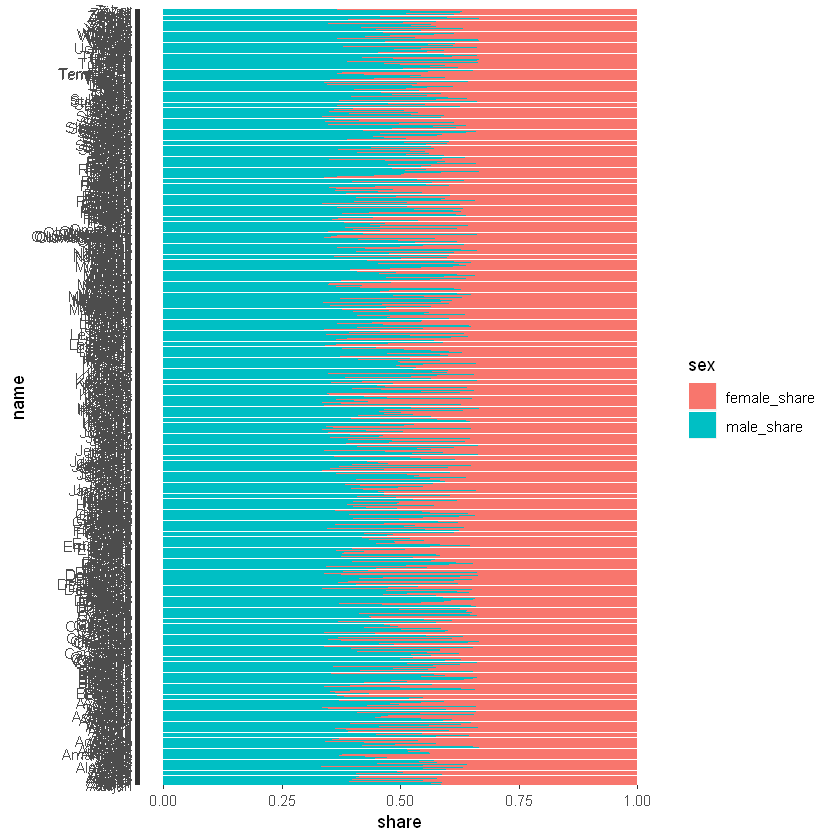

In [29]:
# ggplot might start out like this (except I don't have only top 15 names)

p = ggplot() + geom_bar(data = unisexnamesdfp, aes(y = share, x = name, fill = sex), 
                           stat="identity")

p = p + coord_flip()

p

ERROR while rich displaying an object: Error: geom_text requires the following missing aesthetics: x, y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj

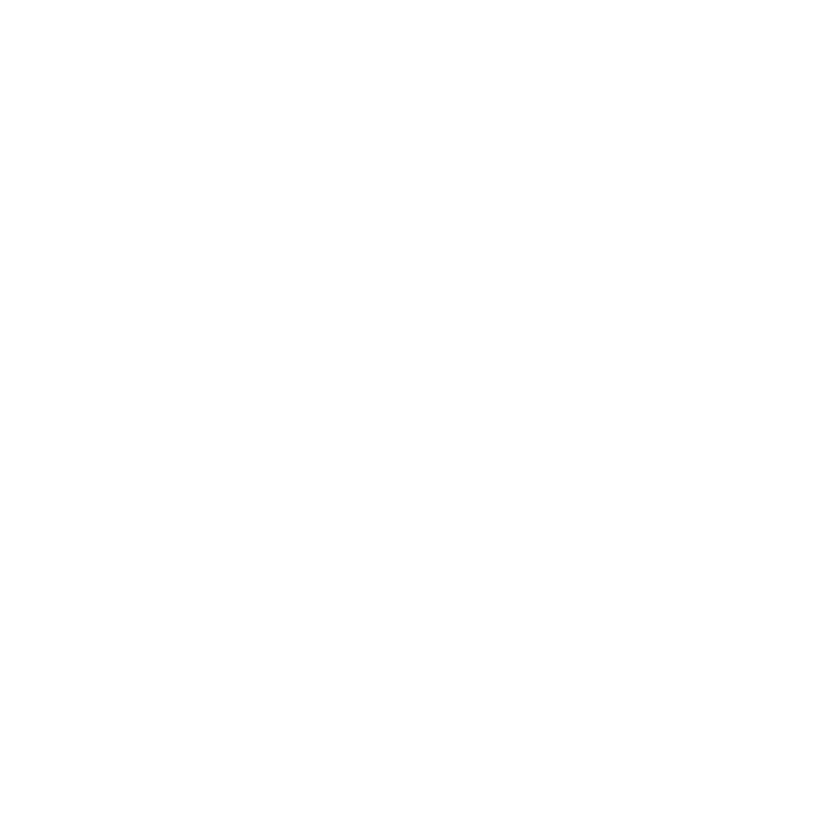

In [30]:
# but this doesn't work when I try to add the label share

p = p + geom_text(aes(label=unisexnamesdfp$share), hjust=1.6, color="black", size=1.5)
  

p


10. Create a similar stacked bar chart from the data to this. FiveThiryEight visualization:

<img src="https://fivethirtyeight.com/wp-content/uploads/2015/06/flowers-datalab-unisexnames-1.png" />